In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV

In [5]:
#Univariate
#How to hadnle missing values.the topic we had cover already.
#1:complete case analysis where we found any of missing vaues then we drop that values.
#2:impute thenumerical values.and fill that with mean or median
#3:then we read about the handle categorical missing data.

In [6]:
#But today i will discussed about:
#1:special technique to apply both numerical and categorical called Random.
#2: Missing indicator
#3:Automatic selection of parameter.

In [18]:
#Random imputer its is the simple technique but it is used quite alot.
#having columns missing at random we fill that values with random numbrs. it is apply to both numerical and categorical values.Distributio remanin same,
#it work with linear algoritham. 
#Coveriance create disturbance

In [16]:
df=sns.load_dataset("iris")

df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [23]:
df=sns.load_dataset("titanic")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
df.isnull().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [26]:
var=df[["age","fare","survived"]]

,age,fare,survived
808,39.0,13.0,0


In [28]:
x=var[["age","fare"]]
y=var[["survived"]]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

In [37]:
x_train["Age_imputed"]=x_train[["age"]]
x_test["Age_imputed"]=x_test["age"]

In [46]:
x_train.head(20)

,age,fare,Age_imputed
770,24.0,9.5000,24.0
152,55.5,8.0500,55.5
731,11.0,18.7875,11.0
775,18.0,7.7500,18.0
324,NaN,69.5500,71.0
589,NaN,8.0500,28.0
502,NaN,7.6292,25.0
488,30.0,8.0500,30.0
140,NaN,15.2458,23.0
629,NaN,7.7333,12.0


In [45]:
x_train["Age_imputed"][x_train["Age_imputed"].isnull()]=x_train["age"].dropna().sample(x_train["age"].isnull().sum()).values
x_test["Age_imputed"][x_test["Age_imputed"].isnull()]=x_test["age"].dropna().sample(x_test["age"].isnull().sum()).values

C:\Users\Waris Hayyat\AppData\Local\Temp\ipykernel_1800\2826627010.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train["Age_imputed"][x_train["Age_imputed"].isnull()]=x_train["age"].dropna().sample(x_train["age"].isnull().sum()).valu

<Axes: ylabel='Density'>

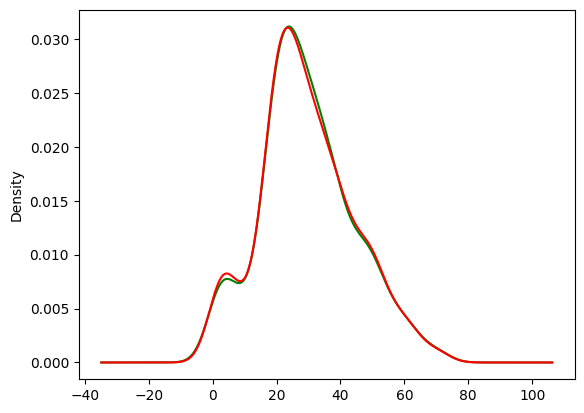

In [51]:
x_train["age"].plot(kind="kde",color="Green")
x_train["Age_imputed"].plot(kind="kde",color="red")

In [54]:
print("Variance of orignal data:",x_train["age"].var())
print("Variance of New data:",x_train["Age_imputed"].var())

Variance of orignal data: 211.9388097573093
Variance of New data: 215.28851513752588


In [56]:
x_train[["age","fare","Age_imputed"]].cov()

,age,fare,Age_imputed
age,211.938810,72.002295,211.938810
fare,72.002295,2637.883197,51.490725
Age_imputed,211.938810,51.490725,215.288515


<Axes: >

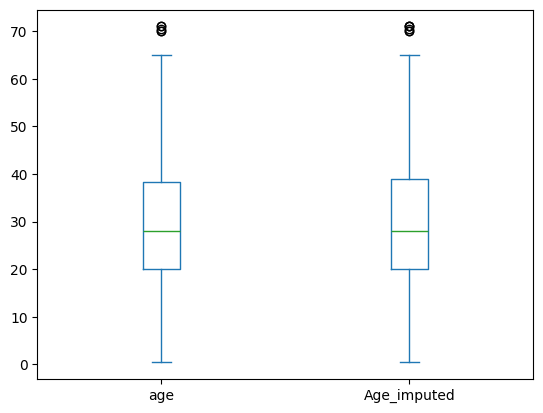

In [58]:
x_train[["age","Age_imputed"]].plot(kind="box")

In [59]:
#Now talk about missing indicator. 
# we make a seprate colum for every columns by using this our model learn diffrence between new colum and old columns.

In [64]:
df=sns.load_dataset("titanic")
x=df[["age","fare"]]
y=df[["survived"]]

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
from sklearn.impute import SimpleImputer

In [74]:
S1=SimpleImputer(add_indicator=True)

In [76]:
x_train=S1.fit_transform(x_train)

In [79]:
x_test=S1.fit_transform(x_test)

In [95]:
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [100]:
#Now i will discuss about Automatically seleecto values for imputation
#we use technique called grid search cv.

In [102]:
df=sns.load_dataset("titanic")
x=df[["age","fare"]]
y=df[["survived"]]